In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

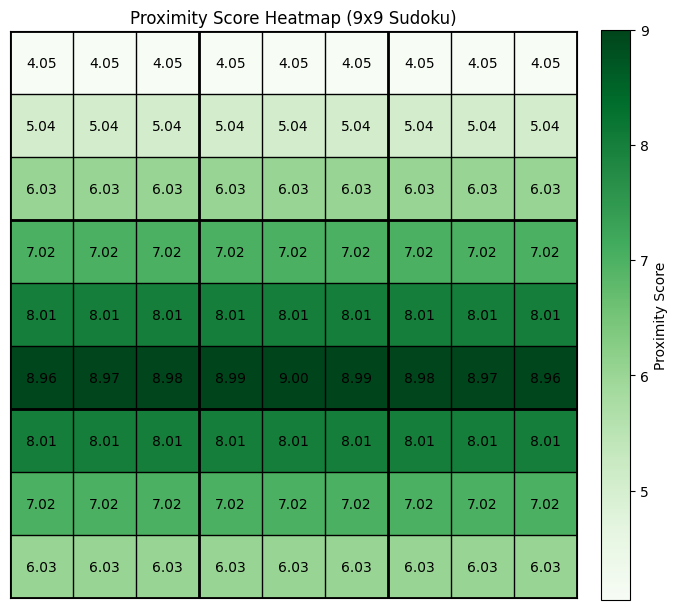

In [2]:
def calculate_proximity_score(N, row_weight=0.99, col_weight=0.01):
    """
    Calculate the proximity scores for a Sudoku grid based on weighted Euclidean distance.

    Parameters:
    N (int): Size of the grid (e.g., 9 for a 9x9 Sudoku).
    row_weight (float): Weight for row distance.
    col_weight (float): Weight for column distance.

    Returns:
    numpy.ndarray: A grid of proximity scores.
    """
    center_row = (N + 1) / 2  # Correct center row index
    center_col = (N - 1) / 2  # Correct center column index

    def distance_to_center(row, col):
        """
        Compute the weighted Euclidean distance to the center of the grid.
        """
        return ((row_weight * (row - center_row)) ** 2 + (col_weight * (col - center_col)) ** 2) ** 0.5

    scores = np.zeros((N, N))
    for row in range(N):
        for col in range(N):
            # Proximity score decreases as the distance to the center increases
            scores[row, col] = max(0, N - distance_to_center(row, col))
    return scores

def plot_proximity_heatmap(scores):
    """
    Plot a clean heatmap of proximity scores for a Sudoku grid.

    Parameters:
    scores (numpy.ndarray): The grid of proximity scores.
    """
    N = scores.shape[0]
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create heatmap
    heatmap = ax.imshow(scores, cmap='Greens', origin='upper')

    # Add numbers in the middle of each cell
    for i in range(N):
        for j in range(N):
            ax.text(j, i, f"{scores[i, j]:.2f}", ha='center', va='center', fontsize=10, color='black')

    # Draw grid lines for 9x9 Sudoku and thicker lines for 3x3 blocks
    for x in range(N + 1):
        ax.axhline(x - 0.5, color='black', linewidth=1)
        ax.axvline(x - 0.5, color='black', linewidth=1)

    for x in range(0, N + 1, 3):
        ax.axhline(x - 0.5, color='black', linewidth=2)
        ax.axvline(x - 0.5, color='black', linewidth=2)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Add color bar
    cbar = plt.colorbar(heatmap, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label("Proximity Score")

    # Set title
    plt.title("Proximity Score Heatmap (9x9 Sudoku)")
    plt.show()

# Generate and plot the proximity heatmap for a 9x9 Sudoku
N = 9
proximity_scores = calculate_proximity_score(N)
plot_proximity_heatmap(proximity_scores)


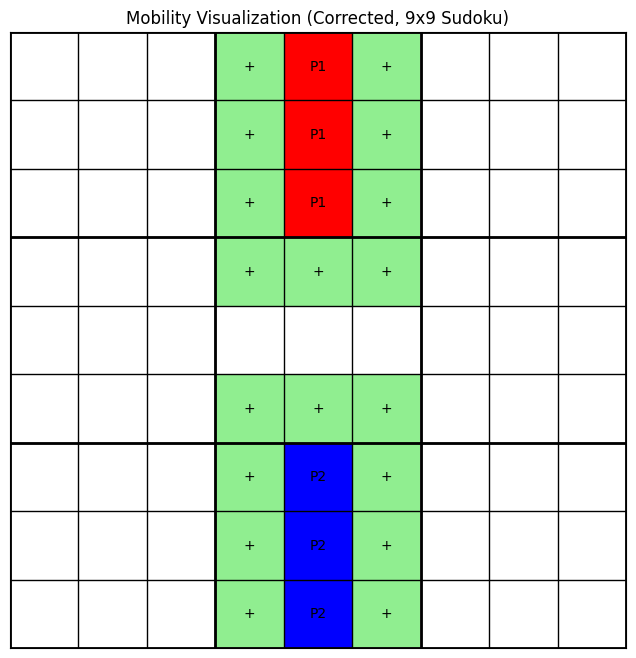

In [5]:
def visualize_mobility_connected_corrected(N, player1_start, player2_start):
    """
    Visualize mobility for two players on a 9x9 Sudoku grid, ensuring all occupied cells are connected.

    Parameters:
    N (int): The size of the grid (e.g., 9 for 9x9 Sudoku).
    player1_start (list of tuples): Starting positions for player 1.
    player2_start (list of tuples): Starting positions for player 2.
    """
    # Initialize the grid
    grid = np.zeros((N, N))

    # Player 1 starts at the top
    player1_positions = player1_start
    for row, col in player1_positions:
        grid[row, col] = -2  # Mark player 1's cells

    # Player 2 starts at the bottom
    player2_positions = player2_start
    for row, col in player2_positions:
        grid[row, col] = -3  # Mark player 2's cells

    # Highlight mobility for player 1
    for row, col in player1_positions:
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
            r, c = row + dr, col + dc
            if 0 <= r < N and 0 <= c < N and grid[r, c] == 0:
                grid[r, c] = -1  # Highlight reachable cells for player 1

    # Highlight mobility for player 2
    for row, col in player2_positions:
        for dr, dc in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
            r, c = row + dr, col + dc
            if 0 <= r < N and 0 <= c < N and grid[r, c] == 0:
                grid[r, c] = -1  # Highlight reachable cells for player 2

    # Plot the grid
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create a custom colormap
    colors = ['white', 'lightgreen', 'red', 'blue']  # Colors: empty, mobility, P1, P2
    cmap = ListedColormap(colors)

    # Map the values to match the colormap
    display_grid = np.where(grid == -2, 2,  # P1 cells
                            np.where(grid == -3, 3,  # P2 cells
                                     np.where(grid == -1, 1, 0)))  # Mobility and empty cells

    # Create a heatmap
    heatmap = ax.imshow(display_grid, cmap=cmap, origin='upper', vmin=0, vmax=3)

    # Add grid lines
    for x in range(N + 1):
        ax.axhline(x - 0.5, color='black', linewidth=1)
        ax.axvline(x - 0.5, color='black', linewidth=1)

    for x in range(0, N + 1, 3):
        ax.axhline(x - 0.5, color='black', linewidth=2)
        ax.axvline(x - 0.5, color='black', linewidth=2)

    # Add text in each cell
    for i in range(N):
        for j in range(N):
            value = grid[i, j]
            if value == -2:
                text = "P1"
            elif value == -3:
                text = "P2"
            elif value == -1:
                text = "+"
            else:
                text = ""
            ax.text(j, i, text, ha='center', va='center', fontsize=10, color='black')

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Add title
    plt.title("Mobility Visualization (Corrected, 9x9 Sudoku)")
    plt.show()

# Example setup
N = 9
player1_start = [(0, 4), (1, 4), (2, 4)]  # Player 1 starts at the top center
player2_start = [(8, 4), (7, 4), (6, 4)]  # Player 2 starts at the bottom center

visualize_mobility_connected_corrected(N, player1_start, player2_start)
